In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten

2024-04-29 08:48:05.748295: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generators

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/Users/raani/Desktop/MINE/ml try practice/archive/animals/animals',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory='/Users/raani/Desktop/MINE/ml try practice/archive/animals/animals',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 3000 files belonging to 3 classes.
Found 3000 files belonging to 3 classes.


Normalize

In [3]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((3,3)),
    Conv2D(64,(2,2),activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(128,(2,2),activation='relu'),
    MaxPooling2D((3,3)),
    Conv2D(128,(2,2),activation='relu'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(3,activation='softmax')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
# Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 84, 84, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371,427 (1.42 MB)

 Trainable params: 371,427 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_ds, epochs=2, validation_data=val_ds)

Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.4383 - loss: 0.9999 - val_accuracy: 0.5727 - val_loss: 0.8657
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.6279 - loss: 0.7509 - val_accuracy: 0.6240 - val_loss: 0.6921


<function matplotlib.pyplot.show(close=None, block=None)>

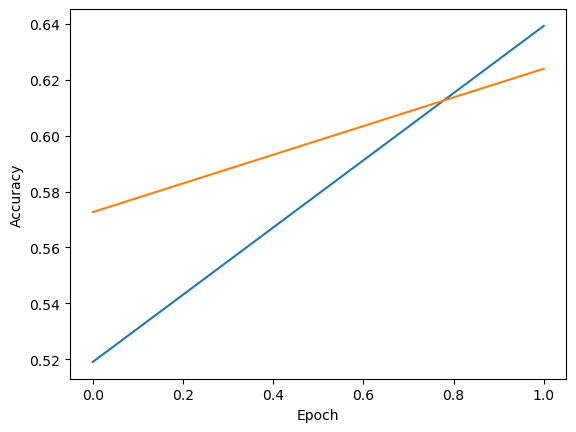

In [14]:
    import matplotlib.pyplot as plt
    #=[ ] { }
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend
    plt.show

In [9]:
# Generate predictions
import numpy as np
predictions = model.predict(val_ds)
predicted_labels = np.argmax(predictions, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step


In [10]:
from sklearn.metrics import classification_report
# Generate classification report
# Extract true labels from val_ds
true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Generate classification report
print(classification_report(true_labels, predicted_labels))


2024-04-29 08:58:33.766603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


              precision    recall  f1-score   support

           0       0.33      0.63      0.43      1000
           1       0.29      0.02      0.03      1000
           2       0.33      0.35      0.34      1000

    accuracy                           0.33      3000
   macro avg       0.32      0.33      0.27      3000
weighted avg       0.32      0.33      0.27      3000



In [11]:
true_labels.shape

(3000,)

In [12]:
from sklearn.metrics import confusion_matrix

# Assuming test_labels and predicted_labels are the true labels and predicted labels respectively
# test_labels: true labels of the test sset
# predicted_labels: predicted labels by your model

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[627  16 357]
 [634  17 349]
 [623  25 352]]


In [13]:
model.save('CNN.keras')